# Predictive-models

This notebook will make a few different learning models, incorporating varying degrees of stats. A basic model will assess only the stats from the "simple" section of `baseballstats.py` (ERA, BA, etc.). An more advanced model will add in the intermediate stats (the "+ stats", award count, etc). A few different models with permutations of these different stats may be tried if time allows

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
import tensorflow
import matplotlib.pyplot as plt

In [2]:
batting = pd.read_csv("battingdata.csv")
pitching = pd.read_csv("pitchingdata.csv")
del batting['Unnamed: 0'] #leftover index column from outputting to csv
del pitching['Unnamed: 0']

# pitching.set_index('playerID')
# batting.set_index('playerID')

bat_target = batting['HoF'].values
batting.pop('HoF')
batting.pop('playerID') #is a string, doesn't work for ML

pitch_target = pitching['HoF'].values
pitching.pop('HoF')
pitching.pop('playerID') #is a string, doesn't work for ML

pitching

,Seasons,Last_season,Awards,WS_titles,allstars,appearances,SO,W,L,G,SV,H,ER,HR,BB,ERA,WHIP,ERA+,FIP
0,12,1901,0,0,0,361,718,142,167,342,2,3071,1283,62,1064,4.222452,1.512067,93.131575,4.445026
1,10,2003,0,0,0,243,894,74,73,242,1,1408,662,130,493,4.444058,1.417951,101.192624,4.590800
2,13,2005,0,0,0,349,818,130,92,340,0,2092,911,220,582,4.274765,1.394161,104.201846,4.833244
3,11,1912,0,0,0,309,998,124,118,291,4,2097,637,31,614,2.491525,1.178183,114.016583,2.553095
4,11,1975,1,0,1,298,932,81,86,297,7,1468,602,160,322,3.653405,1.207013,96.446440,3.369398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,12,1936,0,2,0,294,534,105,97,294,10,1958,805,113,529,4.199189,1.441461,100.300224,4.923931
987,10,1975,0,0,1,360,667,100,111,329,3,1679,672,143,550,3.498650,1.289433,100.775011,3.817810
988,13,1946,1,1,2,448,906,158,121,391,7,2424,926,139,902,3.357325,1.339868,117.856447,4.018870
989,13,1992,0,0,2,609,548,53,53,609,216,700,240,34,283,2.668863,1.214580,144.644918,3.040528


To see what the data looks like, see `playwithdata.ipynb`, specifically the section titled "Some Visualization". In short, there are two categories of players: pitchers and batters. While I would like to include more fielding metrics, I do not have access to the game-level data to provide any meaningful fielding metrics. Therefore all of the data refers solely to the pitching stats for pitchers and the hitting stats for position players. we will see how well this works with the different training models.

In [3]:
classifiers = [tree.DecisionTreeClassifier(),
               neighbors.KNeighborsClassifier(),
               svm.SVC(),
               ensemble.RandomForestClassifier(),
               linear_model.LogisticRegression(solver="lbfgs",multi_class="auto", max_iter=1e4)
              ]


Start with the basic data: the "counting stats" and what is normally referred to as the "slash line" (AVG, OPB, SLG). In the advanced section, the slash line will be swapped for OPS+ and wOBA to see if they can paint a better picture. For pitching the "basic stats" will be ERA and WHIP while the "advanced stats" will be ERA+ and FIP

In [4]:
batting.pop('OPS+')
batting.pop('wOBA'); #they'll be reloaded later

In [5]:
pitching.pop('ERA+') #same here
pitching.pop('FIP');

In [6]:
Xb_train, Xb_test, yb_train, yb_test = model_selection.train_test_split(batting, bat_target, train_size = 0.7)
Xp_train, Xp_test, yp_train, yp_test = model_selection.train_test_split(pitching, pitch_target, train_size = 0.7)
print(Xb_train.shape, yb_train.shape, Xp_train.shape, yp_train.shape)

(1220, 16) (1220,) (693, 17) (693,)


## Hitting first:

In [7]:
for classifier in classifiers:
    classifier.fit(Xb_train, yb_train)
    yb_test_pred = classifier.predict(Xb_test)
    metrics.confusion_matrix(yb_test, yb_test_pred)
    print(str(classifier), "\n", metrics.classification_report(yb_test, yb_test_pred))


DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       477
           1       0.81      0.63      0.71        46

    accuracy                           0.95       523
   macro avg       0.89      0.81      0.84       523
weighted avg       0.95      0.95      0.95       523

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       477
           1       0.76      0.35      0.48        46

    accuracy                           0.93       523
   macro avg       0.85      0.67      0.72       523
weighted avg       0.92      0.93      0.92       523

SVC() 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       477
           1       0.81      0.28      0.42        46

    accuracy                           0.93       523
   macro avg       0.87      0.64      0.69       523
weighted avg  

Let's see what the decision tree looks like...

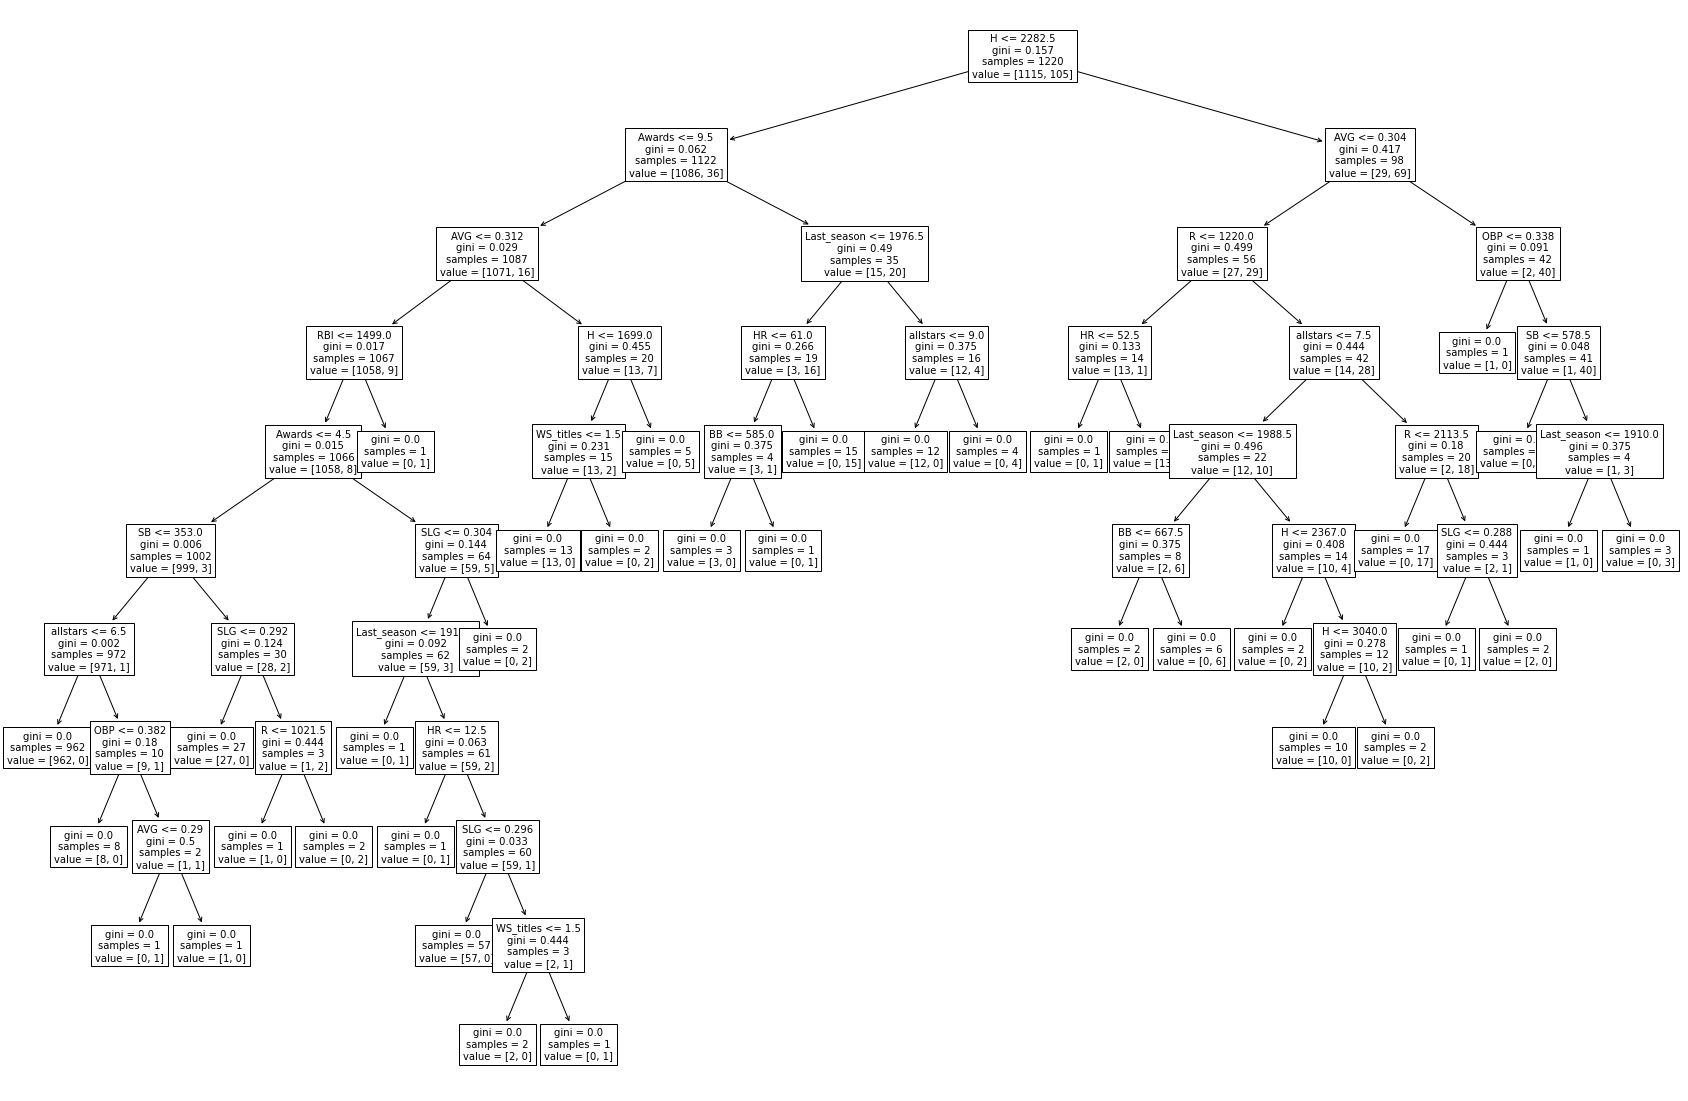

In [8]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(Xb_train, yb_train)
yb_test_pred = classifier.predict(Xb_test)
plt.figure(figsize=(30,20))  
tree.plot_tree(classifier, fontsize=10, feature_names=batting.columns)
plt.show()

## Now pitching:

In [9]:
for classifier in classifiers:
    classifier.fit(Xp_train, yp_train)
    yp_test_pred = classifier.predict(Xp_test)
    metrics.confusion_matrix(yp_test, yp_test_pred)
    print(str(classifier), "\n", metrics.classification_report(yp_test, yp_test_pred))

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       281
           1       0.75      0.71      0.73        17

    accuracy                           0.97       298
   macro avg       0.87      0.85      0.86       298
weighted avg       0.97      0.97      0.97       298

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       281
           1       0.75      0.35      0.48        17

    accuracy                           0.96       298
   macro avg       0.86      0.67      0.73       298
weighted avg       0.95      0.96      0.95       298

SVC() 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       281
           1       1.00      0.24      0.38        17

    accuracy                           0.96       298
   macro avg       0.98      0.62      0.68       298
weighted avg  

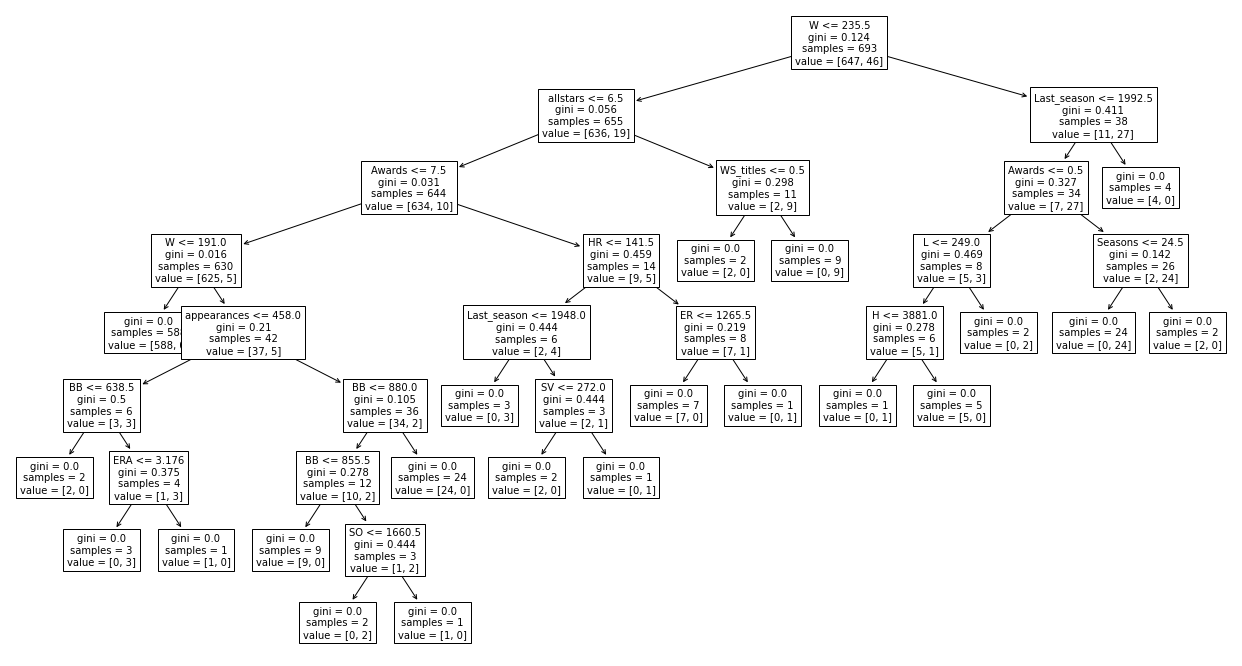

In [10]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(Xp_train, yp_train)
yb_test_pred = classifier.predict(Xp_test)
plt.figure(figsize=(22,12))  
tree.plot_tree(classifier, fontsize=10, feature_names=pitching.columns)
plt.show()

## Advanced Stats:

We'll now reload the data and keep the advnced stats instead of their simpler replacements

In [12]:
batting = pd.read_csv("battingdata.csv")
pitching = pd.read_csv("pitchingdata.csv")
del batting['Unnamed: 0'] #leftover index column from outputting to csv
del pitching['Unnamed: 0']

# pitching.set_index('playerID')
# batting.set_index('playerID')

bat_target = batting['HoF'].values
batting.pop('HoF')
batting.pop('playerID') #is a string, doesn't work for ML

pitch_target = pitching['HoF'].values
pitching.pop('HoF')
pitching.pop('playerID'); #is a string, doesn't work for ML

batting

,Seasons,Last_season,Awards,WS_titles,allstars,appearances,G,R,H,HR,RBI,SB,BB,AVG,OBP,SLG,OPS+,wOBA
0,10,1989,0,0,0,649,564,190,414,20,146,28,65,0.261034,0.288928,0.261034,84.421422,0.294842
1,10,1978,0,0,0,378,367,72,168,14,82,4,95,0.188341,0.265144,0.188341,58.815285,0.260767
2,10,1960,0,0,0,621,602,206,455,24,189,25,215,0.257790,0.332842,0.257790,93.507962,0.393599
3,15,2000,2,0,1,1644,1467,625,1138,187,702,13,652,0.269541,0.368411,0.269541,124.535429,0.467597
4,13,1997,0,1,0,1272,1111,374,700,42,282,24,326,0.238826,0.313110,0.238826,78.272300,0.299397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,10,1922,0,2,0,555,548,218,438,14,185,54,149,0.272388,0.330260,0.272388,117.064828,0.371242
1739,11,1995,0,1,0,1334,1246,462,942,134,505,18,343,0.241477,0.304378,0.241477,97.421317,0.381531
1740,19,1904,0,1,0,1678,1676,1529,2303,107,1301,257,840,0.342403,0.422312,0.342403,180.483052,0.442783
1741,10,1985,1,0,1,909,894,380,881,123,474,59,180,0.278269,0.314858,0.278269,117.011677,0.364844


In [13]:
batting.pop('AVG')
batting.pop('OBP'); #remove basic stats now
batting.pop('SLG')

pitching.pop('ERA') #same here
pitching.pop('WHIP');

In [14]:
Xb_train, Xb_test, yb_train, yb_test = model_selection.train_test_split(batting, bat_target, train_size = 0.7)
Xp_train, Xp_test, yp_train, yp_test = model_selection.train_test_split(pitching, pitch_target, train_size = 0.7)
print(Xb_train.shape, yb_train.shape, Xp_train.shape, yp_train.shape)

(1220, 15) (1220,) (693, 17) (693,)


### Batting, then pitching:

In [15]:
for classifier in classifiers:
    classifier.fit(Xb_train, yb_train)
    yb_test_pred = classifier.predict(Xb_test)
    metrics.confusion_matrix(yb_test, yb_test_pred)
    print(str(classifier), "\n", metrics.classification_report(yb_test, yb_test_pred))

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       472
           1       0.59      0.63      0.61        51

    accuracy                           0.92       523
   macro avg       0.78      0.79      0.78       523
weighted avg       0.92      0.92      0.92       523

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       472
           1       0.81      0.51      0.63        51

    accuracy                           0.94       523
   macro avg       0.88      0.75      0.80       523
weighted avg       0.94      0.94      0.93       523

SVC() 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       472
           1       0.76      0.37      0.50        51

    accuracy                           0.93       523
   macro avg       0.85      0.68      0.73       523
weighted avg  

In [16]:
for classifier in classifiers:
    classifier.fit(Xp_train, yp_train)
    yp_test_pred = classifier.predict(Xp_test)
    metrics.confusion_matrix(yp_test, yp_test_pred)
    print(str(classifier), "\n", metrics.classification_report(yp_test, yp_test_pred))

DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       282
           1       0.69      0.69      0.69        16

    accuracy                           0.97       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.97      0.97      0.97       298

KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       282
           1       0.42      0.31      0.36        16

    accuracy                           0.94       298
   macro avg       0.69      0.64      0.66       298
weighted avg       0.93      0.94      0.94       298

SVC() 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       282
           1       0.50      0.25      0.33        16

    accuracy                           0.95       298
   macro avg       0.73      0.62      0.65       298
weighted avg  